<a href="https://colab.research.google.com/github/BalkeesRekik/DS1002/blob/main/Copy_of_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [63]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [1]:
import pandas as pd
df= pd.read_csv('https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv', sep=';')
df

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2022-12-31T00:00:00.000Z,2022-12-31T23:59:59.999Z,2022-12-31T15:23:00.000Z,2022-12-31T00:21:00.000Z,0.838968,0.853502,0.835226,0.842688,3001502.06,2.771561e+08,2022-12-31T23:59:59.999Z
1,2022-12-30T00:00:00.000Z,2022-12-30T23:59:59.999Z,2022-12-30T04:22:00.000Z,2022-12-30T15:12:00.000Z,0.860193,0.864752,0.826643,0.839048,3608615.07,2.759588e+08,2022-12-30T23:59:59.999Z
2,2022-12-29T00:00:00.000Z,2022-12-29T23:59:59.999Z,2022-12-29T00:49:00.000Z,2022-12-29T21:03:00.000Z,0.885723,0.887118,0.843029,0.860231,3766979.57,2.829258e+08,2022-12-29T23:59:59.999Z
3,2022-12-28T00:00:00.000Z,2022-12-28T23:59:59.999Z,2022-12-28T00:20:00.000Z,2022-12-28T10:44:00.000Z,0.921162,0.925702,0.869842,0.886091,4192949.85,2.914310e+08,2022-12-28T23:59:59.999Z
4,2022-12-27T00:00:00.000Z,2022-12-27T23:59:59.999Z,2022-12-27T14:19:00.000Z,2022-12-27T19:12:00.000Z,0.931138,0.955402,0.916414,0.923668,4574953.05,3.037898e+08,2022-12-27T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...
736,2021-01-06T00:00:00.000Z,2021-01-06T23:59:59.999Z,2021-01-06T23:59:03.000Z,2021-01-06T01:41:03.000Z,8.671285,9.390797,8.425946,9.390797,31404627.93,8.859932e+08,2021-01-06T23:59:59.999Z
737,2021-01-05T00:00:00.000Z,2021-01-05T23:59:59.999Z,2021-01-05T22:44:03.000Z,2021-01-05T06:19:03.000Z,7.528216,8.714947,7.081120,8.664688,49479278.39,8.174869e+08,2021-01-05T23:59:59.999Z
738,2021-01-04T00:00:00.000Z,2021-01-04T23:59:59.999Z,2021-01-04T06:40:03.000Z,2021-01-04T10:18:03.000Z,6.948680,7.632146,6.358218,7.514079,40526109.15,7.089305e+08,2021-01-04T23:59:59.999Z
739,2021-01-03T00:00:00.000Z,2021-01-03T23:59:59.999Z,2021-01-03T16:25:03.000Z,2021-01-03T00:25:03.000Z,6.201133,7.007523,6.171834,6.923968,31046652.87,6.532553e+08,2021-01-03T23:59:59.999Z


## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [2]:
num_rows = len(df.axes[0])
print("Number of rows: " , num_rows)

num_columns = len(df.axes[1])
print("Number of columns: ", num_columns)




Number of rows:  741
Number of columns:  11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [9]:
df.drop_duplicates(inplace=True)


new_df = df.drop(columns=['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'])
new_df['timestamp'] = new_df['timestamp'].str.replace('T23:59:59.999Z', '')
new_df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
#I tried to make the date interpreted as a date (and not a string)

new_df


<ipython-input-9-6460ee2002b4>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['timestamp'] = new_df['timestamp'].str.replace('T23:59:59.999Z', '')


,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27
...,...,...,...,...,...,...
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04


Now display the first 10 rows of the cleaned dataset.

In [10]:
new_df.head(10)

,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27
5,0.894567,1.011183,0.893652,0.930696,7065306.21,2022-12-26
6,0.924432,0.935517,0.894370,0.894657,2577834.83,2022-12-25
7,0.957505,0.975671,0.921085,0.924433,5055004.16,2022-12-24
8,1.027133,1.038282,0.948058,0.957006,17088962.94,2022-12-23
9,0.873973,1.127198,0.835625,1.027162,22418556.51,2022-12-22


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [11]:
new_df['close_change'] = new_df['close'] - new_df['close'].shift(1)
new_df

,open,high,low,close,volume,timestamp,close_change
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31,NaN
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30,-0.003640
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29,0.021183
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28,0.025860
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27,0.037577
...,...,...,...,...,...,...,...
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07,0.181143
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06,-0.171334
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05,-0.726110
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04,-1.150608


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [12]:
positive_growth = new_df[new_df['close_change'] > 0]
positive_growth_sorted = positive_growth.sort_values(by='close_change', ascending= False)
print(positive_growth_sorted.head(10)[['close_change', 'timestamp']])

     close_change   timestamp
56      16.623292  2022-11-07
468     14.497738  2021-09-16
598     14.017812  2021-05-18
478      9.506381  2021-09-15
473      8.315742  2021-09-19
484      6.929033  2021-09-09
350      6.770635  2022-01-20
594      6.228516  2021-05-22
481      5.201864  2021-09-12
605      5.154806  2021-05-11


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [13]:
new_df['rate_of_change (%)'] = (new_df['close_change']/new_df['close']) * 100
new_df

,open,high,low,close,volume,timestamp,close_change,rate_of_change (%)
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31,NaN,NaN
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30,-0.003640,-0.433855
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29,0.021183,2.462476
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28,0.025860,2.918404
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27,0.037577,4.068215
...,...,...,...,...,...,...,...,...
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07,0.181143,1.894374
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06,-0.171334,-1.824484
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05,-0.726110,-8.380101
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04,-1.150608,-15.312701


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [14]:
positive_rate_change = new_df[new_df['rate_of_change (%)'] > 0]
negative_rate_change = new_df[new_df['rate_of_change (%)'] < 0]

positive_rate_change_sorted = positive_rate_change.sort_values(by='rate_of_change (%)', ascending= False)
negative_rate_change_sorted = negative_rate_change.sort_values(by='rate_of_change (%)', ascending= True)

print(positive_rate_change_sorted.head(5)[['rate_of_change (%)', 'timestamp']])
print(negative_rate_change_sorted.head(5)[['rate_of_change (%)', 'timestamp']])

     rate_of_change (%)   timestamp
56            75.075175  2022-11-07
55            58.313683  2022-11-08
51            28.705850  2022-11-12
598           27.510072  2021-05-18
53            26.344388  2022-11-10
     rate_of_change (%)   timestamp
54           -52.868637  2022-11-09
493          -34.382542  2021-08-31
693          -31.766452  2021-02-18
25           -24.684838  2022-12-08
49           -24.488632  2022-11-14


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

[]

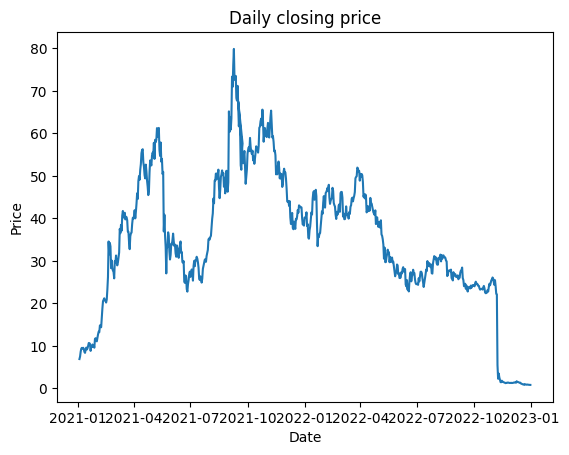

In [15]:
import matplotlib.pyplot as plt

plt.plot(new_df['timestamp'],new_df['close'])
plt.title('Daily closing price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot()


[]

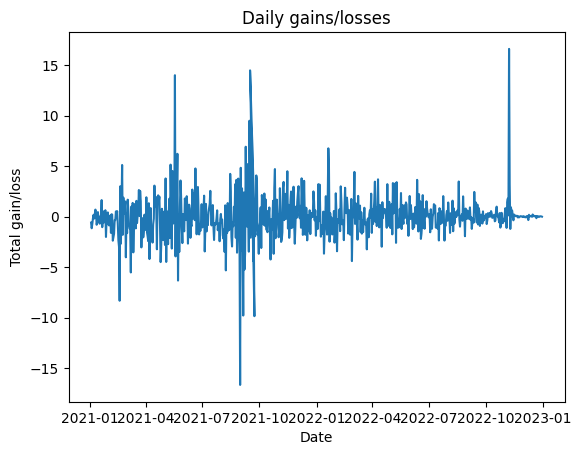

In [16]:
import matplotlib.pyplot as plt

plt.plot(new_df['timestamp'],new_df['close_change'])
plt.title('Daily gains/losses')
plt.xlabel('Date')
plt.ylabel('Total gain/loss')
plt.plot()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

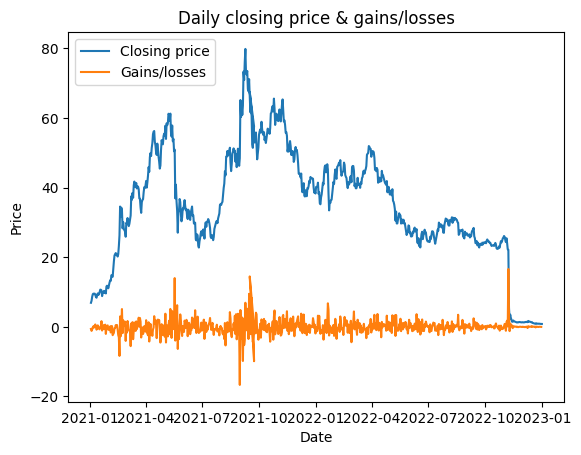

In [17]:
import matplotlib.pyplot as plt


plt.plot(new_df['timestamp'],new_df['close'], label= "Closing price")
plt.plot(new_df['timestamp'],new_df['close_change'],label= "Gains/losses")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily closing price & gains/losses')
plt.legend(loc='upper left')
plt.show()


Citations:

[sep](https://https://stackoverflow.com/questions/40270582/how-do-i-separate-columns-using-sep-in-python-pandas)

[shift](https://https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)